## ADVANCED DATA SCIENCE

## GROUP ASSIGNMENT : How to start

 
Data Description
-----------------------

The dataset is a multi-feature digit dataset. It consists of features of handwritten numerals (`0'--`9')
extracted from a collection of Dutch utility maps. 

200 patterns per class (for a total of 2,000 patterns) have been digitized in binary
images. These digits are represented in terms of the following six
feature sets (files): 

1. mfeat-fou: 76 Fourier coefficients of the character shapes; 
2. mfeat-fac: 216 profile correlations; 
3. mfeat-kar: 64 Karhunen-Love coefficients; 
4. mfeat-pix: 240 pixel averages in 2 x 3 windows; 
5. mfeat-zer: 47 Zernike moments; 
6. mfeat-mor: 6 morphological features. 

In each file the 2000 patterns are stored in ASCI on 2000 lines. The
first 200 patterns are of class `0', followed by sets of 200 patterns
for each of the classes `1' - `9'. Corresponding patterns in different
feature sets (files) correspond to the same original character.

The source image dataset is lost. Using the pixel-dataset (mfeat-pix)
sampled versions of the original images may be obtained (15 x 16 pixels).

Total number of instances:
--------------------------
2000 (200 instances per class)

Total number of attributes:
---------------------------
649 (distributed over 6 datasets,see above)

no missing attributes

Total number of classes:
------------------------
10

Format:
------
6 files, see above.
Each file contains 2000 lines, one for each instance.
Attributes are SPACE separated and can be loaded by Matlab as> load filename
No missing attributes. Some are integer, others are real.




### MAIN TASK : Multi-class classification of Handwritten Digits using Supervised Methods

## Part 1 : Exploratory Data Analysis

In [35]:
## IMPORT THE NECESSARY LIBRARIES

import pandas as pd      # for data manipulation
import numpy as np       # useful for working with arrays
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns # data visualization

In [36]:
## LOADING DATA FROM MY COMPUTER

mfeat_fac = pd.read_csv("Dataset/mfeat-fac.csv", sep =';')
mfeat_fou = pd.read_csv("Dataset/mfeat-fou.csv", sep = ';')
mfeat_kar = pd.read_csv("Dataset/mfeat-kar.csv", sep = ';')
mfeat_pix = pd.read_csv("Dataset/mfeat-pix.csv", sep = ';')
mfeat_zer = pd.read_csv("Dataset/mfeat-zer.csv", sep = ';')
mfeat_mor = pd.read_csv("Dataset/mfeat-mor.csv", sep = ';')

In [37]:
## Print each dataset to see how it looks like

mfeat_fac

,fac1,fac2,fac3,fac4,fac5,fac6,fac7,fac8,fac9,fac10,...,fac207,fac208,fac209,fac210,fac211,fac212,fac213,fac214,fac215,fac216
0,98,236,531,673,607,647,2,9,3,6,...,474,536,628,632,18,36,8,15,12,13
1,121,193,607,611,585,665,7,9,2,4,...,520,458,570,634,15,32,11,13,15,11
2,115,141,590,605,557,627,12,6,3,3,...,535,498,572,656,20,35,16,14,13,6
3,90,122,627,692,607,642,0,6,4,5,...,576,549,628,621,16,35,7,12,15,9
4,157,167,681,666,587,666,8,6,1,4,...,594,525,568,653,16,35,10,15,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,304,242,927,626,564,674,25,17,0,7,...,912,507,577,757,15,24,11,14,10,18
1996,324,330,919,713,609,693,28,16,8,9,...,898,554,620,632,12,25,11,10,12,17
1997,337,299,852,724,581,660,22,14,10,10,...,841,579,590,681,18,27,13,15,17,21
1998,247,261,866,633,565,615,24,15,2,4,...,839,498,556,706,16,26,13,13,15,15


In [38]:
mfeat_fou

,fou1,fou2,fou3,fou4,fou5,fou6,fou7,fou8,fou9,fou10,...,fou67,fou68,fou69,fou70,fou71,fou72,fou73,fou74,fou75,fou76
0,0.065882,0.197312,0.103826,0.270362,0.616078,0.035856,0.424572,0.089701,0.367773,0.037065,...,0.123448,0.113374,0.074343,0.281666,0.067795,0.344182,0.038963,0.394366,0.049971,0.344871
1,0.049142,0.175971,0.105515,0.227095,0.599280,0.041217,0.431078,0.096801,0.326739,0.059661,...,0.045310,0.069337,0.045386,0.254264,0.045447,0.335659,0.021719,0.445277,0.083978,0.354092
2,0.034172,0.227649,0.108766,0.127697,0.612494,0.056554,0.470639,0.041903,0.324267,0.044569,...,0.019858,0.218842,0.041087,0.360464,0.047154,0.377408,0.052099,0.445029,0.071234,0.261465
3,0.062336,0.217979,0.080243,0.289592,0.546316,0.045779,0.425545,0.022841,0.331454,0.119052,...,0.083995,0.085479,0.087658,0.151880,0.075950,0.293462,0.022675,0.408291,0.063010,0.401376
4,0.061970,0.198358,0.111239,0.253460,0.608455,0.023631,0.415246,0.091866,0.309310,0.049142,...,0.021004,0.106960,0.032283,0.248565,0.015674,0.386276,0.039481,0.434701,0.069218,0.405403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.171874,0.221525,0.426470,0.077220,0.264413,0.220274,0.452574,0.161113,0.356788,0.081889,...,0.108996,0.197440,0.197778,0.205866,0.138887,0.160848,0.126190,0.247345,0.239117,0.136807
1996,0.152025,0.347439,0.323534,0.087706,0.427077,0.313656,0.371549,0.262768,0.396422,0.124391,...,0.212160,0.161606,0.033621,0.173155,0.295227,0.259417,0.345691,0.068303,0.158352,0.282327
1997,0.335606,0.318426,0.257948,0.225381,0.417769,0.123067,0.333455,0.342044,0.398151,0.079550,...,0.236628,0.121659,0.316333,0.244846,0.132893,0.042988,0.250740,0.141576,0.038776,0.114591
1998,0.253910,0.171202,0.302622,0.181066,0.326383,0.167960,0.417409,0.399065,0.266153,0.097131,...,0.155442,0.168154,0.147167,0.268675,0.199125,0.128708,0.285220,0.230322,0.103664,0.130003


In [39]:
mfeat_kar

,kar1,kar2,kar3,kar4,kar5,kar6,kar7,kar8,kar9,kar10,...,kar55,kar56,kar57,kar58,kar59,kar60,kar61,kar62,kar63,kar64
0,-10.297008,-11.666789,11.560669,-2.081316,4.044656,4.086815,-2.558072,-8.476935,2.138135,3.503082,...,1.078083,0.921927,0.496387,-0.643667,0.284104,0.286555,0.348625,1.814691,-1.351353,-0.473910
1,-5.036009,-12.885333,0.161155,0.592460,3.123534,4.220469,-6.411771,-6.335328,-0.244622,1.346073,...,0.942353,2.938791,1.429883,-2.336344,1.281628,-0.098321,0.582357,0.485792,0.642451,0.613107
2,-9.639157,-6.655898,0.388687,-1.717650,0.300346,3.400769,-7.240785,-1.659405,-0.874005,4.153403,...,-0.413174,-0.023028,-0.025265,1.259838,-0.441360,-0.960094,1.995843,1.097748,0.827182,-1.767840
3,-6.650375,-7.043851,4.104350,-2.342780,3.494658,3.924822,-9.874812,-6.556576,-1.364269,1.153308,...,-0.961236,-1.043815,-0.204508,-1.981150,0.982438,-0.144233,-1.449328,-0.913552,-0.771735,0.304992
4,-10.664524,-10.974133,0.194391,0.453885,2.193088,-3.304663,-8.376592,-4.241146,2.964818,-0.949622,...,0.152957,1.448160,-1.254907,-3.481295,-0.563889,1.529335,0.510399,0.298318,-0.943213,1.149847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-2.415248,-6.619806,5.053538,6.662300,12.136673,-1.447842,-2.321873,4.042169,-2.981806,-0.106785,...,-1.438355,-0.714285,0.017051,0.460572,-0.951763,0.241901,-0.399051,-0.304857,-0.068411,-1.049052
1996,5.892684,-8.185875,1.819305,6.871263,1.021332,-0.869375,-6.759738,-3.891993,-4.781352,3.355656,...,-0.672254,1.273016,0.227573,0.444086,1.439473,-0.405706,0.378187,-0.128056,0.925637,1.798053
1997,1.881613,-9.650881,0.317780,0.655888,7.882648,1.740497,0.026943,-4.412813,-3.403179,-0.614610,...,-0.121590,-1.622687,0.309964,0.473773,0.916683,0.971719,0.689472,-0.439637,0.287013,-0.420793
1998,-1.530886,-10.183775,-1.055864,4.956079,11.729954,1.480784,-2.806543,0.602515,-5.411981,-2.165543,...,-0.220936,-0.466334,0.128358,-0.888494,-0.014442,-0.780897,1.000286,1.405214,0.435514,-0.225426


In [40]:
mfeat_pix

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix231,pix232,pix233,pix234,pix235,pix236,pix237,pix238,pix239,pix240
0,0,3,4,4,6,6,6,6,6,5,...,4,4,4,4,4,3,0,0,0,0
1,0,0,0,0,0,0,1,3,4,4,...,2,4,4,4,4,2,0,0,0,0
2,0,0,1,4,4,4,4,4,4,3,...,1,3,4,4,4,4,4,2,1,0
3,0,0,3,3,2,2,4,5,6,6,...,4,4,4,4,2,0,0,0,0,0
4,0,0,0,0,0,0,3,4,6,6,...,4,4,4,4,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,1,3,4,5,6,4,4,...,4,4,4,4,4,4,4,0,0,0
1996,0,0,0,0,3,6,6,6,6,6,...,4,4,4,3,0,0,0,0,0,0
1997,0,0,0,2,4,4,4,6,4,4,...,0,2,4,4,4,1,0,0,0,0
1998,0,0,0,0,0,0,2,4,4,5,...,3,4,4,4,4,2,0,0,0,0


In [41]:
mfeat_zer

,zer1,zer2,zer3,zer4,zer5,zer6,zer7,zer8,zer9,zer10,...,zer38,zer39,zer40,zer41,zer42,zer43,zer44,zer45,zer46,zer47
0,0.011033,0.831466,15.351804,75.806559,171.554214,490.156556,206.416027,0.122135,2.601646,11.472709,...,1.713529,33.810340,9.858915,1.399891,148.138058,326.239452,9.711070,20.007248,47.032578,539.208457
1,0.038271,1.166746,10.526913,42.369276,85.187116,420.360566,253.569574,0.033657,0.390566,11.700830,...,2.590208,35.400531,70.681899,6.674412,155.135985,377.832675,8.140633,44.536711,46.338954,518.496567
2,0.042698,1.225007,8.273804,31.744786,54.448177,404.103204,389.980746,0.041733,0.937399,11.629045,...,1.476285,19.477230,30.093590,7.858211,150.126419,419.565747,4.530921,26.292170,44.574822,549.912691
3,0.032418,1.638247,19.205283,51.196682,57.181760,429.052011,256.174645,0.073624,1.973268,13.057108,...,1.349613,14.179518,30.564085,7.097728,173.840759,441.350376,3.706023,13.432311,51.739930,574.887814
4,0.015866,0.611561,8.627839,37.325052,48.509025,459.909634,238.572767,0.046477,1.117292,10.012169,...,0.667971,8.705403,30.242473,9.015714,167.021185,332.479997,1.806273,23.689300,50.407770,492.227513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.018696,0.060507,4.189839,20.072573,136.863862,364.365568,83.535937,0.027723,0.175661,6.677457,...,2.289602,37.077931,229.878330,6.376995,144.500902,393.876660,8.672527,152.791625,43.559482,501.537544
1996,0.025601,0.373184,8.199696,36.255929,63.651474,217.184626,107.002051,0.053221,1.002008,12.029996,...,2.230959,8.122498,224.796064,7.282318,187.335473,353.453408,1.389084,161.716981,53.922259,482.428339
1997,0.024194,0.785229,9.852438,47.772260,71.338044,381.053077,76.972270,0.051574,1.860790,21.352962,...,2.592315,23.227692,122.971707,6.250161,124.337857,359.585224,4.643621,101.472040,37.013903,430.544358
1998,0.010046,0.238167,1.285469,11.191213,81.659420,414.859326,38.144435,0.034859,1.212122,16.690799,...,3.369291,69.833696,175.418772,3.563793,140.067305,486.688709,16.109266,126.684436,41.154583,571.426195


In [42]:
mfeat_mor

,mor1,mor2,mor3,mor4,mor5,mor6
0,1.0,0.0,0.0,133.150861,1.311693,1620.221779
1,1.0,0.0,0.0,126.724861,1.302745,1609.334822
2,1.0,0.0,0.0,131.173861,1.319031,1568.978435
3,1.0,0.0,0.0,129.478861,1.270878,1695.055281
4,1.0,0.0,0.0,127.262861,1.329637,1647.720235
...,...,...,...,...,...,...
1995,1.0,1.0,1.0,157.498861,1.655794,5326.025889
1996,1.0,1.0,1.0,152.404861,1.620345,5243.267754
1997,1.0,1.0,1.0,134.672861,1.541987,3766.763222
1998,1.0,1.0,1.0,142.926861,1.426381,4118.327320


In [43]:
## Print the Shape of each dataset
print('Shape mfeat_fac:', mfeat_fac.shape)
print('Shape mfeat_fou:', mfeat_fou.shape)
print('Shape mfeat_kar:', mfeat_kar.shape)
print('Shape mfeat_pix:', mfeat_pix.shape)
print('Shape mfeat_zer:', mfeat_fac.shape)

Shape mfeat_fac: (2000, 216)
Shape mfeat_fou: (2000, 76)
Shape mfeat_kar: (2000, 64)
Shape mfeat_pix: (2000, 240)
Shape mfeat_zer: (2000, 216)


### Combining all the features 

We combine the 6 features

In [44]:
features_data = pd.concat([mfeat_fac,mfeat_fou,mfeat_kar,mfeat_pix,mfeat_zer,mfeat_mor], axis=1)

In [45]:
features_data

,fac1,fac2,fac3,fac4,fac5,fac6,fac7,fac8,fac9,fac10,...,zer44,zer45,zer46,zer47,mor1,mor2,mor3,mor4,mor5,mor6
0,98,236,531,673,607,647,2,9,3,6,...,9.711070,20.007248,47.032578,539.208457,1.0,0.0,0.0,133.150861,1.311693,1620.221779
1,121,193,607,611,585,665,7,9,2,4,...,8.140633,44.536711,46.338954,518.496567,1.0,0.0,0.0,126.724861,1.302745,1609.334822
2,115,141,590,605,557,627,12,6,3,3,...,4.530921,26.292170,44.574822,549.912691,1.0,0.0,0.0,131.173861,1.319031,1568.978435
3,90,122,627,692,607,642,0,6,4,5,...,3.706023,13.432311,51.739930,574.887814,1.0,0.0,0.0,129.478861,1.270878,1695.055281
4,157,167,681,666,587,666,8,6,1,4,...,1.806273,23.689300,50.407770,492.227513,1.0,0.0,0.0,127.262861,1.329637,1647.720235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,304,242,927,626,564,674,25,17,0,7,...,8.672527,152.791625,43.559482,501.537544,1.0,1.0,1.0,157.498861,1.655794,5326.025889
1996,324,330,919,713,609,693,28,16,8,9,...,1.389084,161.716981,53.922259,482.428339,1.0,1.0,1.0,152.404861,1.620345,5243.267754
1997,337,299,852,724,581,660,22,14,10,10,...,4.643621,101.472040,37.013903,430.544358,1.0,1.0,1.0,134.672861,1.541987,3766.763222
1998,247,261,866,633,565,615,24,15,2,4,...,16.109266,126.684436,41.154583,571.426195,1.0,1.0,1.0,142.926861,1.426381,4118.327320


In [46]:
# Check the shape of the all dataset

features_data.shape

(2000, 649)

In [47]:
# Checking and confirming if there are missing values in the dataset

features_data.isna().sum()

fac1    0
fac2    0
fac3    0
fac4    0
fac5    0
       ..
mor2    0
mor3    0
mor4    0
mor5    0
mor6    0
Length: 649, dtype: int64

In [48]:
# Checking the summary statistic of the dataset

features_data.describe()

,fac1,fac2,fac3,fac4,fac5,fac6,fac7,fac8,fac9,fac10,...,zer44,zer45,zer46,zer47,mor1,mor2,mor3,mor4,mor5,mor6
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,272.051500,322.725500,774.82450,754.339000,640.460500,684.47200,19.450000,18.373000,15.359000,9.054000,...,9.206768,86.405616,54.625111,508.902572,0.492500,1.733500,0.713500,156.418886,1.639569,6155.200435
std,91.275454,109.426588,140.14157,109.173768,48.940117,85.07886,11.351561,7.351795,8.887216,4.084412,...,6.780826,52.027535,11.190058,71.008030,0.664955,1.141985,0.699759,25.010014,0.291316,3757.634467
min,67.000000,81.000000,500.00000,543.000000,437.000000,439.00000,0.000000,1.000000,0.000000,0.000000,...,0.362926,0.753130,19.956263,322.226686,0.000000,0.000000,0.000000,99.508861,1.143130,1439.534940
25%,208.000000,247.000000,656.75000,667.000000,607.000000,642.00000,10.000000,13.000000,8.000000,5.000000,...,4.444497,40.332461,46.509687,455.272657,0.000000,1.000000,0.000000,135.014361,1.363562,3099.331040
50%,274.500000,324.000000,766.00000,736.000000,636.500000,676.00000,20.000000,18.000000,15.000000,10.000000,...,7.417669,83.125987,54.120179,504.737620,0.000000,2.000000,1.000000,150.063861,1.625846,5255.432237
75%,338.000000,406.000000,879.00000,830.000000,667.000000,716.00000,29.000000,24.000000,22.000000,12.000000,...,11.849198,127.611792,62.907443,558.841944,1.000000,3.000000,1.000000,175.728861,1.881523,9093.955756
max,515.000000,565.000000,1264.00000,1134.000000,823.000000,1047.00000,42.000000,39.000000,39.000000,17.000000,...,39.049934,218.877200,89.229699,777.861827,2.000000,6.000000,5.000000,231.276861,2.558830,17572.199943


## Create the reponse variable

We'll create a response variable column called 'response_var' which contains the classes (0 − 9). The
first two hundred rows belongs to ”0” class followed by the next 200 rows which belongs
to ”1” class and so on to the last 200 rows which belongs to class ”9”. This response variable is
created to help us to performe the supervised learning method such as  SVM, Decision trees, logistic regression, random forest, etc.

In [49]:
# Getting the true labels for the dataset
range(len(features_data))

range(0, 2000)

In [50]:


# digits = [0,1,2,3,4,5,6,7,8,9] or [1,2,3,4,5,6,7,8,9,10]


response_var = []
for i in range(len(features_data)):
    if i<200:
        response_var.append(0)
    elif 200 <= i < 400:
        response_var.append(1)
    elif 400 <= i < 600:
        response_var.append(2)
    elif 600 <= i < 800:
        response_var.append(3)
    elif 800 <= i < 1000:
        response_var.append(4)
    elif 1000 <= i < 1200:
        response_var.append(5)
    elif 1200 <= i < 1400:
        response_var.append(6)
    elif 1400 <= i < 1600:
        response_var.append(7)
    elif 1600 <= i < 1800:
        response_var.append(8)
    else:
        response_var.append(9)
# Turning the response variable into Data Frame 

response_var = pd.DataFrame(response_var)
response_var

,0
0,0
1,0
2,0
3,0
4,0
...,...
1995,9
1996,9
1997,9
1998,9


In [51]:
response_var.nunique() #check the number of unique values

0    10
dtype: int64

In [52]:
## Concatenate features and response variable

features_response_date = pd.concat([features_data,response_var], axis=1)

In [53]:
features_response_date.shape

(2000, 650)

## Part 2: descriptive analysis (PCA ) then apply a clustering method

## Note that for this part we will work only with features data not the response variable

In [54]:
#Let's start by doing PCA

# The necessary libraries to import for PCA

from sklearn.preprocessing import StandardScaler  # for data standardization
from sklearn.decomposition import PCA # for dimension reduction

In [57]:
# Step 1 for PCA: Data standardization
#Use your combined features data

std = StandardScaler()   # initializing the function
features_data_std = std.fit_transform(features_data)    # standardizing the data
features_data_std = pd.DataFrame(features_data_std)
features_data_std

,0,1,2,3,4,5,6,7,8,9,...,639,640,641,642,643,644,645,646,647,648
0,-1.907359,-0.792743,-1.740279,-0.745228,-0.683874,-0.440549,-1.537618,-1.275246,-1.390997,-0.747908,...,0.074390,-1.276535,-0.678677,0.426902,0.763401,-1.518350,-1.019892,-0.930581,-1.125782,-1.207172
1,-1.655311,-1.185799,-1.197835,-1.313272,-1.133515,-0.228927,-1.097040,-1.275246,-1.503546,-1.237697,...,-0.157267,-0.804946,-0.740678,0.135145,0.763401,-1.518350,-1.019892,-1.187582,-1.156505,-1.210070
2,-1.721063,-1.661122,-1.319171,-1.368244,-1.705786,-0.675683,-0.656462,-1.683411,-1.390997,-1.482591,...,-0.689741,-1.155705,-0.898369,0.577686,0.763401,-1.518350,-1.019892,-1.009649,-1.100586,-1.220813
3,-1.995027,-1.834798,-1.055086,-0.571150,-0.683874,-0.499332,-1.713849,-1.683411,-1.278448,-0.992802,...,-0.811423,-1.402941,-0.257899,0.929497,0.763401,-1.518350,-1.019892,-1.077439,-1.265922,-1.187252
4,-1.260802,-1.423461,-0.669665,-0.809362,-1.092639,-0.217171,-1.008924,-1.683411,-1.616096,-1.237697,...,-1.091659,-1.205746,-0.376977,-0.234892,0.763401,-1.518350,-1.019892,-1.166066,-1.064171,-1.199853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.350110,-0.737898,1.086141,-1.175842,-1.562718,-0.123117,0.489042,-0.186804,-1.728645,-0.503013,...,-0.078807,1.276297,-0.989128,-0.103747,0.763401,-0.642463,0.409529,0.043193,0.055709,-0.220719
1996,0.569282,0.066495,1.029042,-0.378748,-0.642997,0.100261,0.753389,-0.322859,-0.828250,-0.013224,...,-1.153199,1.447891,-0.062826,-0.372928,0.763401,-0.642463,0.409529,-0.160537,-0.066005,-0.242749
1997,0.711744,-0.216871,0.550834,-0.277966,-1.215268,-0.287711,0.224695,-0.594969,-0.603152,0.231670,...,-0.673117,0.289658,-1.574220,-1.103788,0.763401,-0.642463,0.409529,-0.869710,-0.335052,-0.635782
1998,-0.274529,-0.564222,0.650758,-1.111708,-1.542280,-0.816764,0.400926,-0.458914,-1.503546,-1.237697,...,1.018198,0.774376,-1.204095,0.880735,0.763401,-0.642463,0.409529,-0.539600,-0.731993,-0.542198


In [58]:
# Performing principal components on standardized features_data dataset

pca = PCA(n_components = 649)
features_data_pca = pca.fit_transform(features_data_std)

In [59]:
pca.components_

array([[ 3.72239544e-02,  6.56321688e-02,  6.79404106e-02, ...,
         2.62068388e-02,  3.45261043e-02,  2.55474810e-02],
       [ 6.86760973e-02,  7.79852241e-02,  4.26412444e-02, ...,
         3.50223038e-03,  2.26504303e-02,  1.77163413e-02],
       [ 7.67681623e-03,  1.04081581e-02,  6.52839019e-02, ...,
        -2.60964633e-02, -2.81717585e-02, -1.60159817e-02],
       ...,
       [-0.00000000e+00,  1.74552357e-16, -3.68461635e-15, ...,
         1.24032729e-16,  2.51534904e-17, -1.58727198e-16],
       [-0.00000000e+00,  1.26144417e-16,  7.65732284e-16, ...,
         4.41324494e-16, -3.45047341e-16, -1.44307309e-16],
       [-0.00000000e+00,  3.19447169e-15, -1.14438778e-14, ...,
         4.11389672e-15, -5.68512251e-15,  2.82759927e-16]])

In [24]:
features_data_pca.shape

(2000, 649)

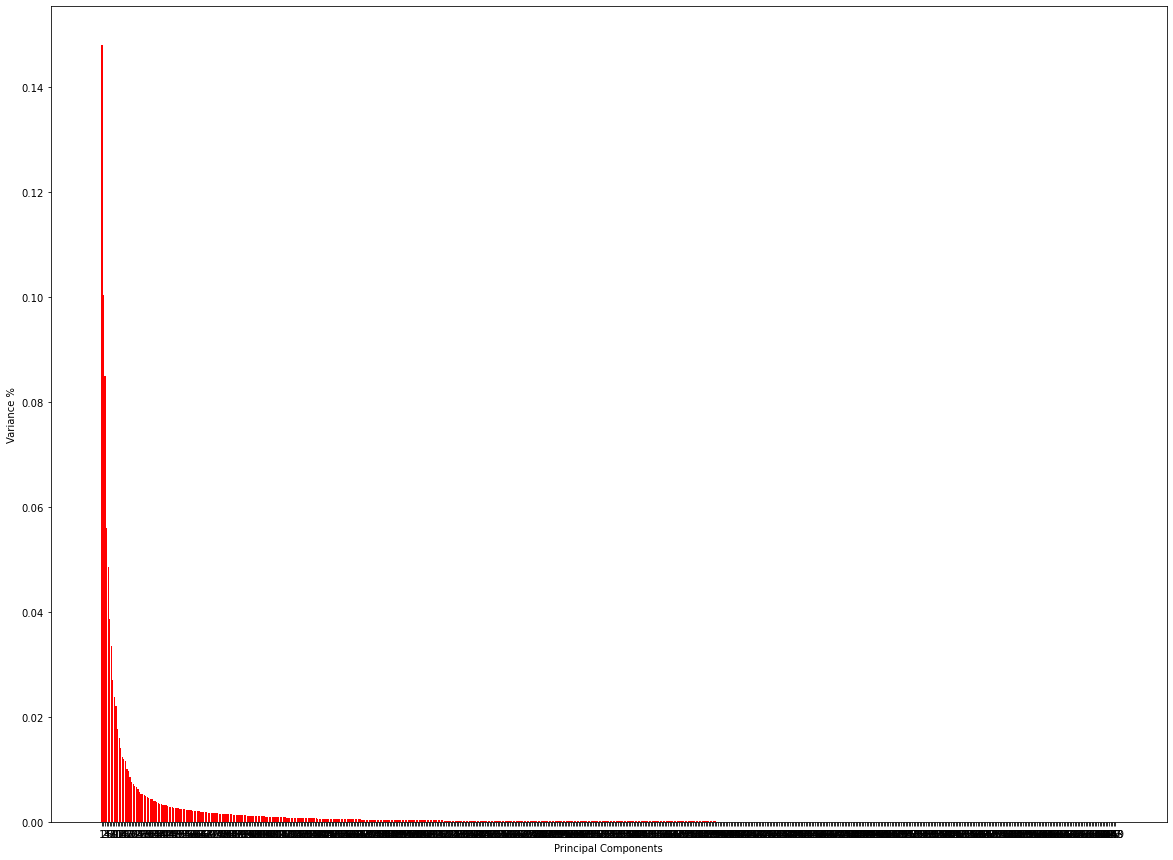

In [60]:
# visualizing the variances for each of the principal components using features_data dataset

PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='red')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.gcf().set_size_inches(20, 15)
plt.xticks(PC)

# keeping principal components of whole_data dataset as a dataframe 
features_data_PCA_components = pd.DataFrame(features_data_pca)

In [61]:
# Checking the amount of variability the first two PCs give

pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]

0.24827755356198758

In [62]:
# Checking the total number of principal components that gives ~77% explained variability

pca.explained_variance_ratio_
summ=0
counter=0
for i in pca.explained_variance_ratio_:
    summ += i
    counter += 1
    if summ >= 0.76:
        break
print('Explained variability is {} and the number of PCs is {}'.format(summ,counter))


Explained variability is 0.760077852693923 and the number of PCs is 30


Since 30 components explain 76% of the original variable, we can selectect 30 components for our analysis.



In [63]:
## PCA of 30 compoments
pca = PCA(n_components = 30)
Features_data_pca = pca.fit_transform(features_data_std)

In [64]:
pca.explained_variance_ratio_

array([0.14797083, 0.10030673, 0.08494313, 0.05601399, 0.04854569,
       0.03870043, 0.03351589, 0.0270455 , 0.02373034, 0.02212483,
       0.01763583, 0.01602035, 0.01403844, 0.01233941, 0.01201763,
       0.01151393, 0.01014229, 0.0096057 , 0.00847248, 0.00764964,
       0.00714215, 0.00674689, 0.00657941, 0.00618369, 0.00577332,
       0.00538413, 0.00526892, 0.00506368, 0.00481456, 0.00474785])

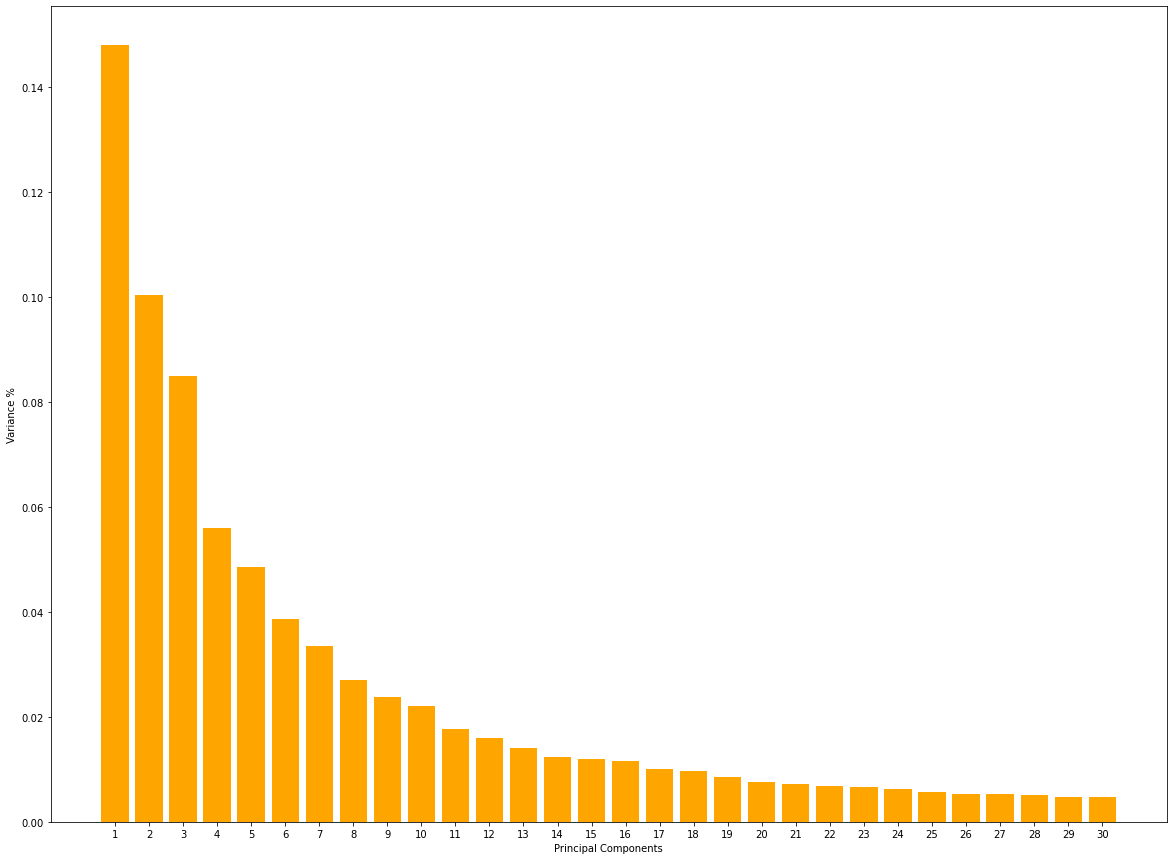

In [65]:
# visualizing the variances for each of the principal components using features_data dataset

PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='orange')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.gcf().set_size_inches(20, 15)
plt.xticks(PC)

# keeping principal components of whole_data dataset as a dataframe 
Features_data_PCA_30components = pd.DataFrame(Features_data_pca)

In [66]:
## PCA data

Features_data_PCA_30components

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-10.792587,-14.217229,-2.735840,-2.498813,-1.183472,7.075655,-2.578779,2.312855,-1.391230,1.417174,...,-0.717346,1.389718,2.481273,-2.830464,1.321036,-1.778742,0.908809,-0.335222,1.997609,1.827533
1,-8.030707,-13.084227,1.290484,-5.413479,-5.434129,7.035879,0.875896,2.192293,-3.160372,1.651194,...,-1.914658,0.387664,-0.109205,-1.746018,-2.807023,-1.650704,-0.989737,0.144265,-0.715798,0.451532
2,-11.856732,-12.375021,0.499917,-0.850888,-4.471142,3.153493,-6.135362,6.616401,-4.272697,-1.366268,...,-1.744240,1.222159,-0.538019,-1.042654,0.706628,-1.209483,-0.950254,-0.826997,0.083704,-0.875371
3,-8.377406,-13.201985,-1.619564,-2.736352,-2.866328,2.761106,-1.290269,6.484546,-3.559916,0.849157,...,0.148227,-0.378883,-2.021656,0.855107,0.382595,0.261490,2.155586,-0.383613,-2.582685,0.796420
4,-11.087021,-10.574100,-0.976119,-6.274910,-2.339075,7.777125,1.281137,2.372109,-2.397868,-3.129940,...,-1.521570,0.318937,0.887699,-1.635870,-3.954255,-1.656591,2.005581,0.263803,0.351900,-0.698441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.769509,-8.680915,10.235653,2.825178,0.665071,-1.597781,-4.233298,-4.576577,2.839034,-9.605087,...,0.655975,1.647135,-1.230987,-0.113185,-0.929053,-0.111128,2.074969,0.546169,0.491354,-2.882793
1996,9.287121,-8.811792,5.358049,0.754445,1.015373,2.737964,2.330241,0.712244,-4.391119,-4.845247,...,-0.059361,-0.314710,-2.111905,-4.463494,-0.453773,0.643892,0.330030,0.643854,-3.641764,0.515114
1997,3.091909,-7.749015,7.409622,7.716558,-4.053819,2.220747,2.002149,-8.093719,-0.343460,-5.732553,...,3.050786,0.977691,3.328761,0.754772,0.630523,-2.440565,0.616939,-0.754097,-0.774178,0.035497
1998,0.014782,-8.775466,12.099608,1.365450,-4.051368,-1.909515,0.013557,-6.131533,-1.581513,-3.620877,...,0.476342,1.337322,-1.808954,2.121512,-0.322537,1.631322,0.629529,-1.557035,0.258445,-2.592544


Based on the number of components select, you can use your pca components on features as your new data for Clustering (Kmeans or HAC)

In my case for example to perform Kmeans, I will use this "Features_data_PCA_30components""

### In order to implement the K-Means clustering, we need to find the optimal number of clusters in which customers will be placed. To find the optimal number of clusters for K-Means, the Elbow method is used based on Within-Cluster-Sum-of-Squares (WCSS).

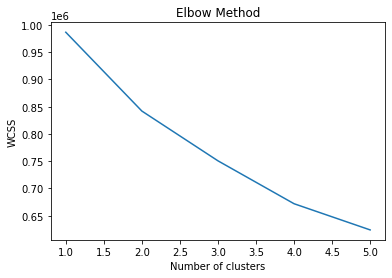

In [67]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Features_data_PCA_30components)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 6), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### fit the K-Means clustering model to the dataset, i.e predict which of the 4 clusters the data item will belong to.

No handles with labels found to put in legend.


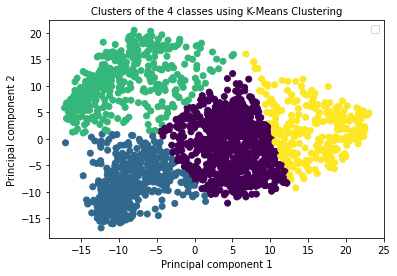

In [71]:
model=KMeans(n_clusters=4)
model.fit(Features_data_PCA_30components.iloc[:,:2])
labels=model.predict(Features_data_PCA_30components.iloc[:,:2])
plt.scatter(Features_data_PCA_30components[0],Features_data_PCA_30components[1],c=labels)
plt.title('Clusters of the 4 classes using K-Means Clustering', size=10)
plt.xlabel('Principal component 1', size=10)
plt.ylabel('Principal component 2',size=10)
plt.legend()
plt.show()

## PART 3: Supervised Learning Methods (indicated in each group)

To perform supervised methods methods, you need **Features and Response Variable**

Since the PCA components explain 90% of my initial data, I will use is as features instead of using the original data

In [73]:
## To start we need to import this library to split our data in train and test data

from sklearn.model_selection import train_test_split # for data splitting 


In [75]:
#X (the features) is the PCA components
X = Features_data_PCA_30components

#y   is the response variable

y= response_var

In [76]:
X.shape

(2000, 31)

In [77]:
y.shape

(2000, 1)

In [78]:
## We should split our data 2 parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [81]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 9)
(600, 9)
(1400, 1)
(600, 1)


## Now after splitting our data

* the X_train and y_train will be use for training the model (fit the model) 
* The X_test will be use for prediction
* The y_test will be used for testing the performance

In [ ]:
## Import your machine learning Method then fit, train and test your model

# Discriminant analysis

Accuracy: 0.7566666666666667


C:\Users\Elnathan Tiokou\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Decision Tree

In [84]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [85]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [86]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9416666666666667
